<a href="https://colab.research.google.com/github/zainnabtarrek/Machine-learning-algorithms-from-scratch/blob/main/Linear_Regression_and_Classification_from_Scratch_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 1 Regression**

**Goal is that the implemented model get the same weights entered.**
1. 5 values for X and get their corresponding Y values =>Xtrain, Ytrain.
2. Apply MSSE(Minimum Sum Squares Technique) to obtain the equation of the line that best fit on the training data(compare to your defined equation)
3. For Y: 2 samples are negative and the other 3 are positive.
4. After we implemented the model, Use noise function and see how the noise will effect the regressor.
**ALL FROM SCRATCH**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
W = 4
C = 6
X = np.array([[1, -3], [1, -2], [1, 0], [1, 1], [1, 2]])
Y_without_noise = np.dot(X, np.array([C, W]))
# Mathmatical equation [1 -3]       = [C + (-3)W]
#                      [1 -2]   [C] = [C + (-2)W]
#                      [1  0] * [W] = [C + (0)W]
#                      [1  1]       = [C + (1)W]
#                      [1  2]       = [C + (2)W]

In [ ]:
# 1.Generate random noise between 0 and 1
noise = np.random.rand(Y_without_noise.shape[0])
# 2.Add noise to the y without noise
Y_with_noise = Y_without_noise + noise
print("Y with noise: ", Y_with_noise)

Y with noise:  [-5.28109361 -1.96006718  6.95964954 10.0863013  14.24097066]


In [ ]:
print("Y without noise: ", Y_without_noise)

Y without noise:  [-6 -2  6 10 14]


In [ ]:
# Regressor line using minimum sum squared error equation
def linear_regression(X,Y):
    # 1.X^T
    X_transpose = np.transpose(X)
    # 2.((X^T).X)^(-1)
    XTX_inv = np.linalg.inv(np.dot(X_transpose, X))
    # 3.((X^T).Y)
    XTY = np.dot(X_transpose, Y)
    # 4.Weights = (((((X^T).X)^-1)((X^T).Y))
    w = np.dot(XTX_inv, XTY)
    return w

In [ ]:
weights_without_noise = linear_regression(X, Y_without_noise)

In [ ]:
weights_with_noise = linear_regression(X, Y_with_noise)

Since the added 1s were added at the first column Of X therefore the C variable will be equal to 6 and W = 4

In [ ]:
print("weights without applying noise: ",weights_without_noise)

weights without applying noise:  [6. 4.]


In [ ]:
print("weights after applying noise: ", weights_with_noise)

weights after applying noise:  [6.38938382 3.95057919]


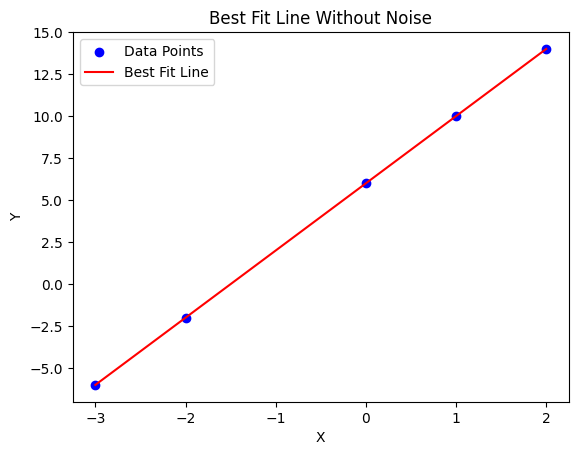

In [ ]:
plt.scatter(X[:,1], Y_without_noise,color='blue', label='Data Points')
plt.plot(X[:,1], np.dot(X, weights_without_noise), color='red', label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Best Fit Line Without Noise')
plt.legend()
plt.show()

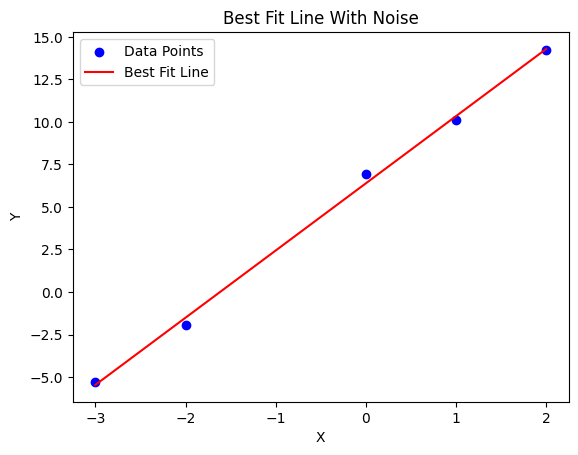

In [ ]:
plt.scatter(X[:,1], Y_with_noise,color='blue', label='Data Points')
plt.plot(X[:,1], np.dot(X, weights_with_noise), color='red', label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Best Fit Line With Noise')
plt.legend()
plt.show()

**As we increase the noise applied on the data points, the data points are going to be away from the regressor line.**

**Part 2 Classification**

1. 2 classes: 1 class with 80:(40,40) train samples and 10,10 test samples and the other class with 40 train samples and 10 test samples.
2. Train your linear classifier using MSSE
3. Let output be positive for class1 and negative for class2
the model is suitable input test samples as class 1 or other

*Optional:* If the classified sample from the first 2 classes, determine the classified sample from which class.

**ALL FROM SCRATCH**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
iris_dataset=load_iris()
iris_df=pd.DataFrame(data = iris_dataset['data'], columns = iris_dataset['feature_names'])
print(iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [ ]:
iris_df = pd.DataFrame(data=iris_dataset.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris_df['species'] = iris_dataset.target_names[iris_dataset.target]
print(iris_df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [ ]:
# Create a label encoder object
label_encoder = LabelEncoder()

# Fit and transform the species column to integer labels
iris_df['species'] = label_encoder.fit_transform(iris_df['species']) # 0 1 2
print(iris_df['species'])

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


group samples of C2, C3 together to form new class
C2

In [ ]:
y = iris_df['species']
y = np.where(y==0,1,-1)
print(y)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]


In [ ]:
X = iris_df.drop(columns=['species'])
print(X)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


add ones ( bias)

In [ ]:

X = np.c_[np.ones((X.shape[0],1)),X]
print(X)

[[1.  5.1 3.5 1.4 0.2]
 [1.  4.9 3.  1.4 0.2]
 [1.  4.7 3.2 1.3 0.2]
 [1.  4.6 3.1 1.5 0.2]
 [1.  5.  3.6 1.4 0.2]
 [1.  5.4 3.9 1.7 0.4]
 [1.  4.6 3.4 1.4 0.3]
 [1.  5.  3.4 1.5 0.2]
 [1.  4.4 2.9 1.4 0.2]
 [1.  4.9 3.1 1.5 0.1]
 [1.  5.4 3.7 1.5 0.2]
 [1.  4.8 3.4 1.6 0.2]
 [1.  4.8 3.  1.4 0.1]
 [1.  4.3 3.  1.1 0.1]
 [1.  5.8 4.  1.2 0.2]
 [1.  5.7 4.4 1.5 0.4]
 [1.  5.4 3.9 1.3 0.4]
 [1.  5.1 3.5 1.4 0.3]
 [1.  5.7 3.8 1.7 0.3]
 [1.  5.1 3.8 1.5 0.3]
 [1.  5.4 3.4 1.7 0.2]
 [1.  5.1 3.7 1.5 0.4]
 [1.  4.6 3.6 1.  0.2]
 [1.  5.1 3.3 1.7 0.5]
 [1.  4.8 3.4 1.9 0.2]
 [1.  5.  3.  1.6 0.2]
 [1.  5.  3.4 1.6 0.4]
 [1.  5.2 3.5 1.5 0.2]
 [1.  5.2 3.4 1.4 0.2]
 [1.  4.7 3.2 1.6 0.2]
 [1.  4.8 3.1 1.6 0.2]
 [1.  5.4 3.4 1.5 0.4]
 [1.  5.2 4.1 1.5 0.1]
 [1.  5.5 4.2 1.4 0.2]
 [1.  4.9 3.1 1.5 0.2]
 [1.  5.  3.2 1.2 0.2]
 [1.  5.5 3.5 1.3 0.2]
 [1.  4.9 3.6 1.4 0.1]
 [1.  4.4 3.  1.3 0.2]
 [1.  5.1 3.4 1.5 0.2]
 [1.  5.  3.5 1.3 0.3]
 [1.  4.5 2.3 1.3 0.3]
 [1.  4.4 3.2 1.3 0.2]
 [1.  5.  3

• Split C1 into 40 samples for train and 10 samples for test

• Split C2 into 80 samples for train and 20 samples for test

In [ ]:
X_train_c1, X_test_c1, y_train_c1, y_test_c1 = train_test_split(X[y == 1], y[y == 1], test_size=0.20, random_state=42)
X_train_c2, X_test_c2, y_train_c2, y_test_c2 = train_test_split(X[y == -1], y[y == -1], test_size=0.2, random_state=42)

In [ ]:
print("class1")
print(X_train_c1.shape)
print(X_test_c1.shape)
print(y_train_c1.shape)
print(y_test_c1.shape)
print("class2")
print(X_train_c2.shape)
print(X_test_c2.shape)
print(y_train_c2.shape)
print(y_test_c2.shape)

class1
(40, 5)
(10, 5)
(40,)
(10,)
class2
(80, 5)
(20, 5)
(80,)
(20,)


 Combine training and testing data for each class

In [ ]:

X_train = np.vstack((X_train_c1, X_train_c2))
y_train = np.concatenate((y_train_c1, y_train_c2))
X_test = np.vstack((X_test_c1, X_test_c2))
y_test = np.concatenate((y_test_c1, y_test_c2))

Train your linear classifier using MSSE

In [ ]:
def best_fit(X,Y):
    # 1.X^T
    X_transpose = np.transpose(X)
    # 2.((X^T).X)^(-1)
    XTX_inv = np.linalg.inv(np.dot(X_transpose, X))
    # 3.((X^T).Y)
    XTY = np.dot(X_transpose, Y)
    # 4.Weights = (((((X^T).X)^-1)((X^T).Y))
    w = np.dot(XTX_inv, XTY)
    return w

In [ ]:
weights = best_fit(X_train, y_train)
print("Weights: ", weights)

Weights:  [-0.72396059  0.12016826  0.47807312 -0.41859655 -0.16621896]


Let output be positive for class 1 and negative for class 2

In [ ]:
def classify_sample(sample, weights):
    prediction = np.dot(sample, weights)
    if prediction > 0:
        return 1
    else:
        return -1

In [ ]:
predictions = [classify_sample(sample, weights) for sample in X_test]
print(predictions)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


Measure performance

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
from sklearn.metrics import f1_score
f1_score_ = f1_score(y_test, predictions)
print(f1_score_)

1.0


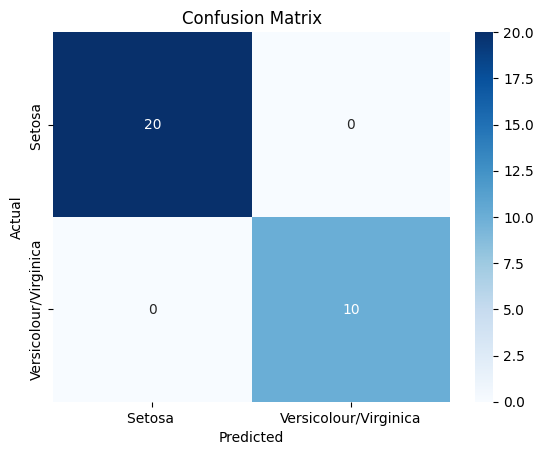

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
classes = iris_df['species'].unique()

conf_matrix2 = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Setosa ", "Versicolour/Virginica"],
            yticklabels=["Setosa ", "Versicolour/Virginica"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()